In [ ]:
from robotodo.engines.isaac._kernel import configure_default_kernel
configure_default_kernel(
    extra_argv=[
        "--/app/name=robotodo.exp.base",

        # "--/app/enableDeveloperWarnings=false",
        "--/log/file=/tmp/todo-isaacsim-min.log",
        # "--/app/settings/loadUserConfig=false",
        # "--/log/enableStandardStreamOutput=true",
        # "--/app/enableStdoutOutput=true",
        # "--no-window",
        # TODO
        # "--/app/content/emptyStageOnStart=false",
        # "--/app/asyncRendering=true",
        # "--enable", "isaacsim.exp.full",

        "--/app/runLoops/main/rateLimitEnabled=false"
        "--/app/runLoops/main/manualModeEnabled=true",
        "--/app/player/useFixedTimeStepping=false",
        
        "--/app/events/qualifiedNames=true"

        # "--/app/vulkan=",
        "--/omni.replicator.asyncRendering=false",
        # "--/exts/omni.kit.async_engine/spinLoopOncePerUpdate=true",
        # TODO BUG replicator wont render if viewport disabled??
        # "--/exts/omni.kit.viewport.window/startup/disableWindowOnLoad=true",
        #
        # "--/exts/omni.appwindow/autocreateAppWindow=false",

        "--/persistent/renderer/startupMessageDisplayed=true",

        # "--/renderer/enabled=rtx",

        # "--enable", "isaacsim.robot.schema",
        # "--enable", "omni.usd.schema.isaac",
        
        "--enable", "omni.physx.tensors",
        "--enable", "omni.replicator.core",

        "--enable", "omni.kit.manipulator.camera",
        "--enable", "omni.kit.manipulator.prim",
        "--enable", "omni.kit.manipulator.selection",
        "--enable", "omni.kit.window.stage",
        "--enable", "omni.kit.window.toolbar",
        "--enable", "omni.kit.window.property",
        "--enable", "omni.kit.quicklayout",
    ], 
    # kit_path=None,
    # kit_path="isaacsim.exp.todo.kit",
    kit_path="isaacsim.exp.base.kit",
    # kit_path="/home/sysadmin/lab/robotodo/__todo__/todo-202511xx/todo.kit",
)


In [1]:
from robotodo.engines.isaac._kernel import configure_default_kernel, get_default_kernel

configure_default_kernel(
    extra_argv=[
        "--/log/file=/tmp/todo-isaacsim-min.log",
    ],
    kit_path="isaacsim.exp.base.kit",
)
get_default_kernel()


[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Base/5.0/user.config.json'

|---------------------------------------------------------------------------------------------|
| Driver Version: 535.247.01    | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|     |                                  |        |     |            | Bus-ID    |            |
|---------------------------------------------------------------------------------

2025-11-28T10:08:08Z [11,981ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-11-28T10:08:08Z [11,981ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-11-28T10:08:09Z [12,095ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


In [2]:
from robotodo.engines.isaac.scene import Scene

scene = Scene.create()

In [8]:
s = scene._kernel.get_settings()
d = s.get_settings_dictionary()
d.get_dict()

{'omnitrace': {'enabled': True, 'autoflush': 0, 'autoflushInterval': 0},
 'pluginsLoaded': {},
 'structuredLog': {'enable': True,
  'heartbeatPeriod': 300,
  'logDirectory': '',
  'defaultLogName': '',
  'logRetentionCount': 3,
  'logSizeLimit': 50,
  'eventQueueSize': 2048,
  'eventIdMode': 'fast-sequential',
  'eventIdType': 'UUID',
  'enableLogConsumer': False,
  'needLogHeaders': True,
  'emitPayloadOnly': False,
  'emitCloudHeartbeat': False,
  'anonymousUserIdMode': 'random',
  'enableJsonStdout': False,
  'queueHighWaterMark': 80},
 'privacy': {'externalBuild': True,
  'version': '1.0',
  'userId': '',
  'email': '',
  'idpId': '',
  'idpName': '',
  'performance': False,
  'personalization': False,
  'usage': False,
  'extraDiagnosticDataOptIn': ''},
 'telemetry': {'enableAnonymousData': False},
 'pluginSearchPaths': {},
 'ext': {'omni.kit.mainwindow': {'margin': {'width': 0, 'height': 0},
   'backgroundColor': 4280230180,
   'startup': {'dockWindows': True}}},
 'usd': {'enable

In [12]:
timeline = (scene._isaac_timeline.get_timeline())
timeline.commit_silently()

In [9]:
scene.autostepping = True

In [3]:
# scene._kernel.enable_extension("omni.kit.manipulator.camera")
# scene._kernel.enable_extension("isaacsim.exp.full")


In [4]:
from robotodo.engines.isaac.scene import Scene

scene = Scene.load(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd"
)

In [5]:
scene.autostepping = True

In [6]:
from robotodo.engines.isaac.articulation import Articulation

panda = Articulation.load(
    "/World/Panda",
    source="https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Robots/FrankaRobotics/FrankaPanda/franka.usd",
    scene=scene,
)
panda

Articulation(['/World/Panda'], scene=Scene())

In [26]:
panda.dof_positions = 0

In [17]:
[j] = panda.joints["panda_joint2"]._usd_prim_ref()
j.GetAppliedSchemas()

['PhysxJointAPI', 'PhysicsDriveAPI:angular', 'PhysicsJointStateAPI:angular']

In [28]:
panda.driver.dof_dampings

tensor([[4583.6626, 4583.6626, 4583.6626, 4583.6626, 4583.6626, 4583.6626,
         4583.6626,   80.0000,    0.0000]])

In [30]:
panda.dof_names

['panda_joint1',
 'panda_joint2',
 'panda_joint3',
 'panda_joint4',
 'panda_joint5',
 'panda_joint6',
 'panda_joint7',
 'panda_finger_joint1',
 'panda_finger_joint2']

In [29]:
panda.driver.dof_stiffnesses

tensor([[22918.3125, 22918.3125, 22918.3125, 22918.3125, 22918.3125, 22918.3125,
         22918.3125,   400.0000,     0.0000]])

In [20]:
panda.driver.dof_target_positions = 0

In [5]:
s = scene._kernel.get_settings()
d = s.get_settings_dictionary()
d.get_dict() #["app"]["name"] #["exts"]["omni.kit.viewport.window"]["startup"] #["disableWindowOnLoad"]

{'omni.replicator.asyncRendering': False,
 'omnitrace': {'enabled': True, 'autoflush': 0, 'autoflushInterval': 0},
 'pluginsLoaded': {},
 'structuredLog': {'enable': True,
  'heartbeatPeriod': 300,
  'logDirectory': '',
  'defaultLogName': '',
  'logRetentionCount': 3,
  'logSizeLimit': 50,
  'eventQueueSize': 2048,
  'eventIdMode': 'fast-sequential',
  'eventIdType': 'UUID',
  'enableLogConsumer': False,
  'needLogHeaders': True,
  'emitPayloadOnly': False,
  'emitCloudHeartbeat': False,
  'anonymousUserIdMode': 'random',
  'enableJsonStdout': False,
  'queueHighWaterMark': 80},
 'privacy': {'externalBuild': True,
  'version': '1.0',
  'userId': '',
  'email': '',
  'idpId': '',
  'idpName': '',
  'performance': False,
  'personalization': False,
  'usage': False,
  'extraDiagnosticDataOptIn': ''},
 'telemetry': {'enableAnonymousData': False},
 'pluginSearchPaths': {},
 'usd': {'enableNestedGprims': True, 'disableCameraAdapter': False},
 'GRPCDataStoreServer': {'ReadThroughDataStore':

In [21]:
from omni.kit.viewport import utility
window = utility.create_viewport_window()

In [26]:
window

Viewport 3

In [7]:
import carb.windowing
import omni.appwindow

# create app window from app window factory interface
app_window_factory = omni.appwindow.acquire_app_window_factory_interface()
app_window = app_window_factory.create_window_from_settings()

# config the app window
# app_window.startup_with_desc(
#     title="Test OS window",
#     width=100,
#     height=100,
#     x=omni.appwindow.POSITION_CENTERED,
#     y=omni.appwindow.POSITION_CENTERED,
#     decorations=True,
#     resize=True,
#     always_on_top=False,
#     scale_to_monitor=False,
#     dpi_scale_override=-1.0
# )
app_window_factory.set_default_window(app_window)

app_window.startup()

# show app window
windowing = carb.windowing.acquire_windowing_interface()
native_app_window = app_window.get_window()
windowing.show_window(native_app_window)

# shutdown app window
# app_window.shutdown()


In [15]:
scene._kernel.start_app_loop_soon()

In [42]:
app_window_factory.set_default_window(app_window)

In [10]:
omni.appwindow.get_default_app_window()

In [ ]:
app_window

In [27]:
app_window.shutdown()

True

In [27]:
from omni.kit.viewport.utility import get_active_viewport_and_window

viewport, window = get_active_viewport_and_window()
# window.visible = False
# window.visible
viewport
# window.visible = False
window.visible = True
window.set_active(True)
window.app_window, window.active_window

(None, None)

In [7]:
%timeit -n 10 scene._kernel.step_app_loop()

20 ms ± 138 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
scene._kernel.start_app_loop_soon()

In [29]:
scene.gravity

array([   0.        ,    0.        , -981.00006104])

In [33]:
scene.autostepping = True

In [34]:
await anext(scene.on_step)

0.01666666753590107

In [12]:
scene = Scene.create()

In [13]:
list(scene.traverse())

['/',
 '/OmniverseKit_Persp',
 '/OmniverseKit_Front',
 '/OmniverseKit_Top',
 '/OmniverseKit_Right',
 '/Render',
 '/Render/OmniverseKit',
 '/Render/OmniverseKit/HydraTextures',
 '/Render/OmniverseKit/HydraTextures/omni_kit_widget_viewport_ViewportTexture_0',
 '/Render/Vars',
 '/Render/Vars/LdrColor']

In [18]:
import omni

omni.appwindow.get_default_app_window()
window_factory = omni.appwindow.acquire_app_window_factory_interface()

win = window_factory.create_window_by_type(omni.appwindow.WindowType.OS)


2025-11-24T07:36:33Z [278,483ms] [Error] [omni.appwindow.plugin] getTitle called on an invalid IAppWindow


''

In [6]:
from robotodo.engines.isaac.sensor import Camera

cam = Camera.create("/World/Cam", scene=scene)

In [7]:
import omni
await omni.replicator.core.orchestrator.step_async(
    # rt_subframes=1, 
    delta_time=0, 
    pause_timeline=False,
    wait_for_render=True,
    # wait_for_render=False,
)

In [13]:
omni.replicator.core.orchestrator.step_async?

Signature:
omni.replicator.core.orchestrator.step_async(
    rt_subframes: int = -1,
    pause_timeline: bool = True,
    delta_time: float = None,
    wait_for_render: bool = True,
) -> None
Docstring:
Step one frame

If Replicator is not yet started, an initialization step is first taken to ensure the necessary settings are set
for data capture. The renderer will then render as many subframes as required by current settings and schedule a
frame to be captured by any active annotators and writers.

Args:
    rt_subframes: Specify the number of subframes to render. During subframe generation, the simulation is paused.
        This is often beneficial when large scene changes occur to reduce rendering artifacts or to allow materials
        to fully load. This setting is enabled for both RTX Real-Time and Path Tracing render modes. Values must be
        greater than ``0``.
    pause_timeline: If ``True``, pause timeline after step. Defaults to ``True``.
    delta_time: The amount of ti

In [ ]:
import omni
ctx = omni.usd.get_context()


In [47]:
await cam.read_rgba()

Warp CUDA error 1: invalid argument (in function memcpy_d2d, /builds/omniverse/warp/warp/native/warp.cu:785)


RuntimeError: Warp copy error: Warp CUDA error 1: invalid argument (in function memcpy_d2d, /builds/omniverse/warp/warp/native/warp.cu:785)

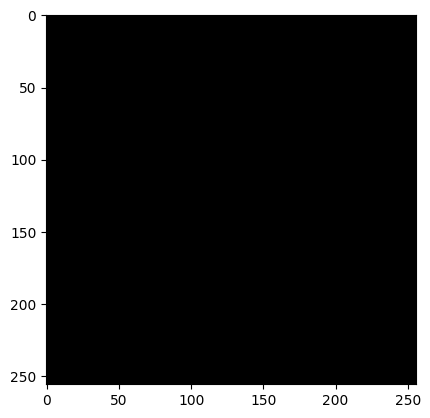

In [19]:
cam.viewer.show()